* The dataset we are working with appears to be related to the IMS-Rexnord bearing data, which is widely used for studying bearing faults and implementing predictive maintenance techniques.

Data Overview:

1: Data Description:

*Data Files: The dataset is organized into multiple individual files.
*File Content: Each file contains vibration signal data recorded for 1 second.
*Number of Points: Each file has 20,480 data points.
*Sampling Rate: The sampling rate is 20 kHz, meaning each file represents 1 second of vibration data.

2:File Naming Convention:

*The file names usually indicate the timestamp of when the data was collected. This is useful for time-series analysis and tracking the progression of any faults.

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d vinayak123tyagi/bearing-dataset

Dataset URL: https://www.kaggle.com/datasets/vinayak123tyagi/bearing-dataset
License(s): U.S. Government Works
 99% 1.55G/1.56G [00:23<00:00, 84.7MB/s]
100% 1.56G/1.56G [00:23<00:00, 70.0MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/bearing-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import matplotlib.pyplot as plt
#import matplotlib_inlinet
import scipy.io
import numpy as np
import pandas as pd
import os

In [12]:
path=r'/content/2nd_test'

In [13]:
filename = '/content/2nd_test/test/2004.02.12.10.32.39'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

In [14]:
dataset

,0,1,2,3
0,-0.049,-0.071,-0.132,-0.010
1,-0.042,-0.073,-0.007,-0.105
2,0.015,0.000,0.007,0.000
3,-0.051,0.020,-0.002,0.100
4,-0.107,0.010,0.127,0.054
...,...,...,...,...
20475,0.049,-0.051,-0.039,-0.044
20476,0.037,0.061,0.115,0.007
20477,-0.012,0.007,0.056,-0.007
20478,-0.012,0.093,0.017,-0.044


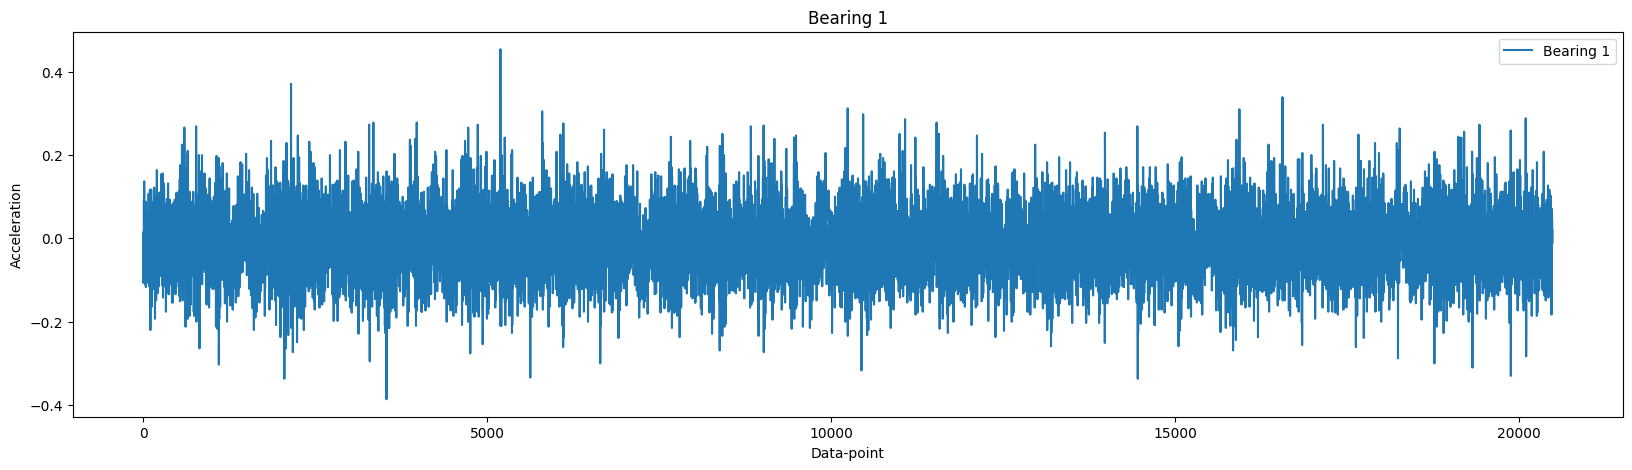

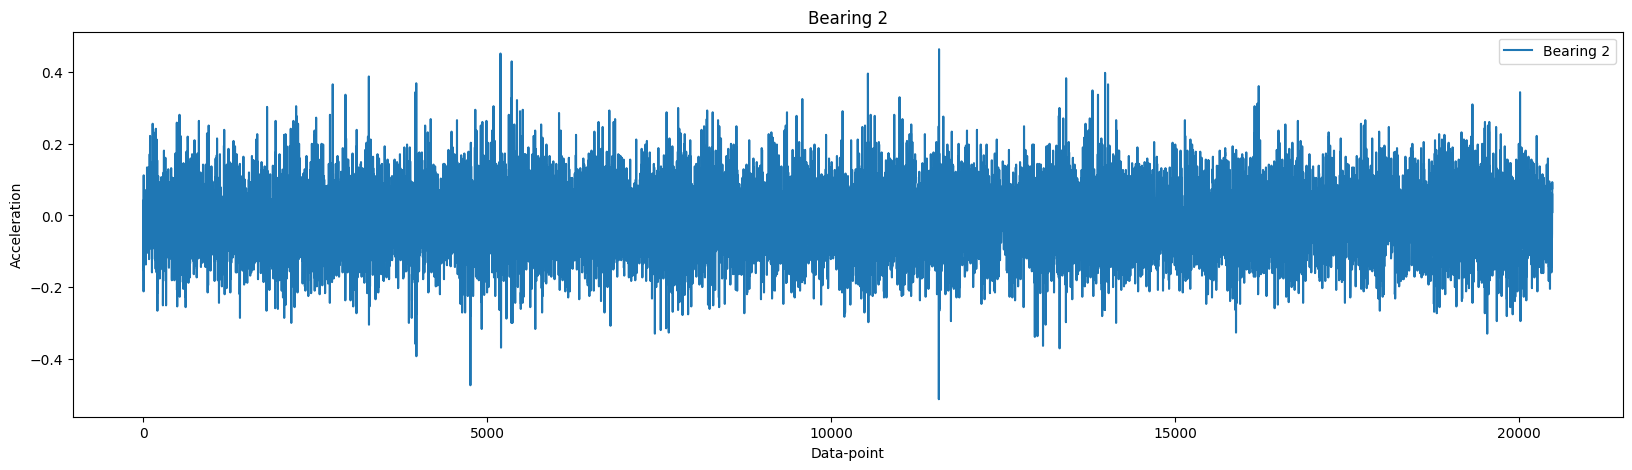

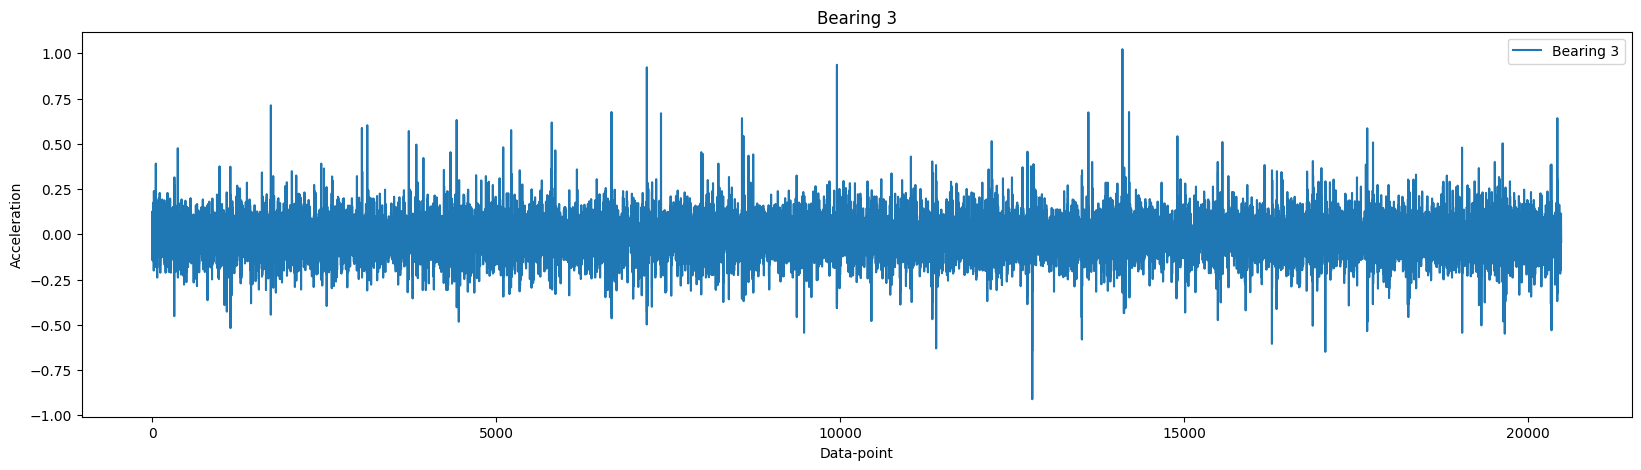

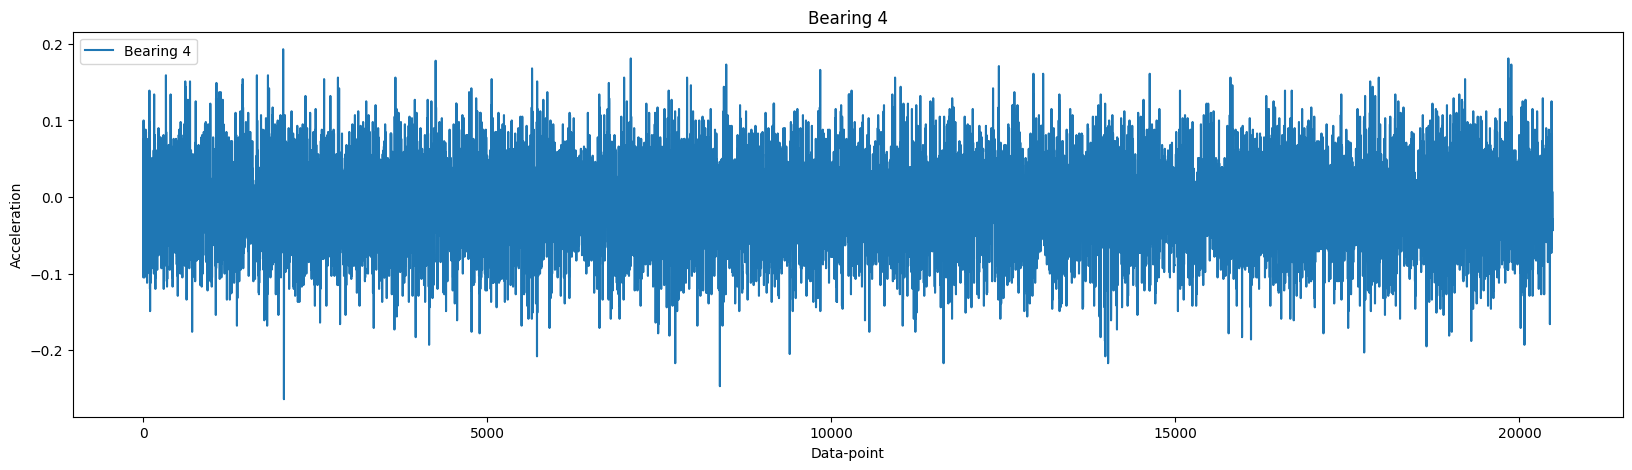

In [15]:
for i in [0,1,2,3]:

    df_bearing=np.array(dataset.iloc[:,i])

    plt.figure(figsize=(20, 5))
    plt.plot(df_bearing)

    plt.legend(['Bearing {}'.format(i+1)])

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('Bearing {}'.format(i+1))
    plt.show()

In [16]:

bearing_no=1

bearing_data = np.array(dataset.iloc[:,bearing_no-1])

bearing_data

array([-0.049, -0.042,  0.015, ..., -0.012, -0.012,  0.02 ])

In [17]:

temp = bearing_data
temp

array([-0.049, -0.042,  0.015, ..., -0.012, -0.012,  0.02 ])

In [18]:
# extracting features from this bearing data

feature_matrix=np.zeros((1,9))
feature_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

calculate following time domain features.

*Maximum value

*Minimum value

*Mean value

*Standard deviation (Unbiased std)

*Root mean square value (RMS)

*Skewness

*Kurtosis

*Crest factor = max/RMS

*Form factor = RMS/mean


In [19]:

def compute_skewness(x):

    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [20]:
def compute_kurtosis(x):

    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [21]:
feature_matrix[0,0] = np.max(temp)
feature_matrix[0,1] = np.min(temp)
feature_matrix[0,2] = np.mean(temp)
feature_matrix[0,3] = np.std(temp, ddof = 1)
feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
feature_matrix[0,5] = compute_skewness(temp)
feature_matrix[0,6] = compute_kurtosis(temp)
feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]

In [22]:
feature_matrix

array([[ 0.454     , -0.386     , -0.010196  ,  0.07347672,  0.074179  ,
         0.08398728,  0.62840828,  6.12033067, -7.27530669]])

In [23]:
df = pd.DataFrame(feature_matrix)
df.index=[filename[:-3]]
df

,0,1,2,3,4,5,6,7,8
/content/2nd_test/test/2004.02.12.10.32,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307


The script provided iterates through vibration data files in a specified directory and extracts nine key statistical features (like max, min, mean, standard deviation, skewness, etc.) for each file. These features are stored in a DataFrame, where each row corresponds to the features extracted from one file. The resulting DataFrame is useful for analyzing the health state of bearings over time, potentially leading to predictive maintenance insights.


In [24]:
###import os
import pandas as pd
import numpy as np

Time_feature_matrix=pd.DataFrame()

test_set=2

bearing_no=1 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'/content/2nd_test/test'
for filename in os.listdir(path):
    if not filename.startswith('.') and os.path.isfile(os.path.join(path, filename)): # Ignore hidden files and directories, and check if it's a file
        dataset = pd.read_csv(os.path.join(path, filename), sep='\t', header=None)
        # Make sure this line has consistent indentation (4 spaces)
        bearing_data = np.array(dataset.iloc[:,bearing_no-1])

        feature_matrix=np.zeros((1,9))
        temp = bearing_data
        feature_matrix[0,0] = np.max(temp)
        feature_matrix[0,1] = np.min(temp)
        feature_matrix[0,2] = np.mean(temp)
        feature_matrix[0,3] = np.std(temp, ddof = 1)
        feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
        feature_matrix[0,5] = compute_skewness(temp)
        feature_matrix[0,6] = compute_kurtosis(temp)
        feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
        feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]

        df = pd.DataFrame(feature_matrix)
        df.index=[filename[:-3]]

        # Use pd.concat to append the DataFrame
        Time_feature_matrix = pd.concat([Time_feature_matrix, df], ignore_index=True)###

This output represents the statistical feature matrix generated from vibration data files, where each row corresponds to a specific timestamp (e.g., 2004.02.12.10.32). The columns contain extracted features such as maximum, minimum, mean, standard deviation, and other statistical measures of the vibration signal for a particular bearing. This data is used to analyze the bearing's health over time.

In [25]:

Time_feature_matrix

,0,1,2,3,4,5,6,7,8
0,0.376,-0.388,-0.001729,0.077893,0.077910,0.001212,0.396897,4.826072,-45.064531
1,0.518,-0.547,-0.002170,0.105188,0.105208,-0.030381,0.878420,4.923600,-48.472500
2,0.347,-0.386,-0.001826,0.076317,0.076337,0.015299,0.446817,4.545634,-41.812826
3,0.417,-0.310,-0.001902,0.076033,0.076055,0.059184,0.417502,5.482845,-39.992165
4,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
...,...,...,...,...,...,...,...,...,...
979,0.361,-0.400,-0.002116,0.076907,0.076934,0.000712,0.467824,4.692313,-36.361475
980,0.317,-0.439,-0.002191,0.077593,0.077622,-0.055855,0.440527,4.083883,-35.431451
981,0.654,-0.706,-0.001451,0.150926,0.150929,0.006866,0.878273,4.333163,-104.004918
982,0.339,-0.371,-0.002142,0.076108,0.076136,-0.000902,0.417019,4.452554,-35.538848


In [26]:
import os
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

def compute_skewness(data):
    return skew(data)

def compute_kurtosis(data):
    return kurtosis(data)

# Initialize an empty DataFrame for the feature matrix
Time_feature_matrix = pd.DataFrame()

test_set = 2
bearing_no = 1  # Provide the Bearing number [1,2,3,4] of the Test set

# Path to the dataset
path = r'/content/2nd_test/test'
for filename in os.listdir(path):
    if not filename.startswith('.') and os.path.isfile(os.path.join(path, filename)):  # Ignore hidden files and directories, and check if it's a file
        dataset = pd.read_csv(os.path.join(path, filename), sep='\t', header=None)
        bearing_data = np.array(dataset.iloc[:, bearing_no - 1])  # Select the column corresponding to the bearing number

        # Calculate the features
        feature_matrix = np.zeros((1, 9))
        temp = bearing_data
        feature_matrix[0, 0] = np.max(temp)
        feature_matrix[0, 1] = np.min(temp)
        feature_matrix[0, 2] = np.mean(temp)
        feature_matrix[0, 3] = np.std(temp, ddof=1)
        feature_matrix[0, 4] = np.sqrt(np.mean(temp ** 2))
        feature_matrix[0, 5] = compute_skewness(temp)
        feature_matrix[0, 6] = compute_kurtosis(temp)
        feature_matrix[0, 7] = feature_matrix[0, 0] / feature_matrix[0, 4]
        feature_matrix[0, 8] = feature_matrix[0, 4] / feature_matrix[0, 2]

        # Create a DataFrame for the current file's features
        df = pd.DataFrame(feature_matrix)

        # Use the filename without the extension as the index
        df.index = [filename[:-4]]  # Remove the last 4 characters (e.g., ".csv" or ".txt")

        # Append the DataFrame to the main feature matrix
        Time_feature_matrix = pd.concat([Time_feature_matrix, df])

# Set the column names
Time_feature_matrix.columns = ['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis', 'Crest Factor', 'Shape Factor']

# Print the final feature matrix
print(Time_feature_matrix)


                   Max    Min      Mean       Std       RMS  Skewness  \
2004.02.15.15.3  0.376 -0.388 -0.001729  0.077893  0.077910  0.001212   
2004.02.17.05.0  0.518 -0.547 -0.002170  0.105188  0.105208 -0.030383   
2004.02.14.00.1  0.347 -0.386 -0.001826  0.076317  0.076337  0.015300   
2004.02.14.10.2  0.417 -0.310 -0.001902  0.076033  0.076055  0.059188   
2004.02.12.11.0  0.608 -0.576 -0.002277  0.078693  0.078724  0.041486   
...                ...    ...       ...       ...       ...       ...   
2004.02.15.16.5  0.361 -0.400 -0.002116  0.076907  0.076934  0.000712   
2004.02.13.14.0  0.317 -0.439 -0.002191  0.077593  0.077622 -0.055859   
2004.02.18.21.0  0.654 -0.706 -0.001451  0.150926  0.150929  0.006866   
2004.02.15.16.0  0.339 -0.371 -0.002142  0.076108  0.076136 -0.000902   
2004.02.14.11.5  0.393 -0.361 -0.002408  0.078413  0.078448  0.009962   

                 Kurtosis  Crest Factor  Shape Factor  
2004.02.15.15.3  0.397229      4.826072    -45.064531  
2004.02.17.

This code processes the extracted feature matrix by renaming the columns for clarity, converting the index to a proper datetime format, sorting the data by time, and optionally saving it as a CSV file for future analysis.










In [27]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:03:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083993,0.628763,6.120331,-7.275307
2004-02-12 10:04:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052142,0.648291,4.895038,-29.161382
2004-02-12 10:05:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032808,0.513475,6.598472,-30.688508
2004-02-12 11:00:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041486,1.157953,7.723217,-34.579322
2004-02-12 11:01:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028224,0.603177,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:04:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510556,12.577705,6.893779,-263.426419
2004-02-19 05:05:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325368,3.759972,5.818035,-102.977656
2004-02-19 06:00:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377095,4.891755,7.235932,-284.094983
2004-02-19 06:01:00,0.005,0.000,0.001857,0.000987,0.002103,0.579698,3.637513,2.377543,1.132578


Test-2 Bearing Dataset Visualization Summary


*Recording Duration: The data was
recorded over a period from February 12, 2004, 10:32:39 to February 19, 2004, 06:22:39.

*Number of Files: The dataset consists of 984 files.

*Number of Channels: There are 4 channels corresponding to 4 different bearings.

*Channel Arrangement:

  *Channel 1: Bearing 1
  *Channel 2: Bearing 2
  *Channel 3: Bearing 3
  *Channel 4: Bearing 4
*File Recording Interval: Data files were recorded every 10 minutes.

*File Format: The data files are in ASCII format.

*Description: The experiment concluded with outer race failure in Bearing 1.

*This summary provides a clear overview of the dataset's structure, the experimental timeline, and the final failure mode observed.

In [28]:
df1 = pd.read_csv("/content/Time_feature_matrix_Bearing_1_Test_2.csv")
df1 = pd.read_csv("/content/Time_feature_matrix_Bearing_1_Test_2.csv",index_col='Unnamed: 0')
df1.index = pd.to_datetime(df1.index)
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:03:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083993,0.628763,6.120331,-7.275307
2004-02-12 10:04:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052142,0.648291,4.895038,-29.161382
2004-02-12 10:05:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032808,0.513475,6.598472,-30.688508
2004-02-12 11:00:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041486,1.157953,7.723217,-34.579322
2004-02-12 11:01:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028224,0.603177,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:04:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510556,12.577705,6.893779,-263.426419
2004-02-19 05:05:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325368,3.759972,5.818035,-102.977656
2004-02-19 06:00:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377095,4.891755,7.235932,-284.094983
2004-02-19 06:01:00,0.005,0.000,0.001857,0.000987,0.002103,0.579698,3.637513,2.377543,1.132578



In the code snippet provided, four DataFrames are being created by reading CSV files, each containing feature matrices for different bearings from the Test-2 dataset. Here's a breakdown of the code:

In [32]:
filename = '/content/2nd_test/test/2004.02.12.10.32.39'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

In [30]:
df1.index = pd.to_datetime(df1.index)
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:03:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083993,0.628763,6.120331,-7.275307
2004-02-12 10:04:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052142,0.648291,4.895038,-29.161382
2004-02-12 10:05:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032808,0.513475,6.598472,-30.688508
2004-02-12 11:00:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041486,1.157953,7.723217,-34.579322
2004-02-12 11:01:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028224,0.603177,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:04:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510556,12.577705,6.893779,-263.426419
2004-02-19 05:05:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325368,3.759972,5.818035,-102.977656
2004-02-19 06:00:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377095,4.891755,7.235932,-284.094983
2004-02-19 06:01:00,0.005,0.000,0.001857,0.000987,0.002103,0.579698,3.637513,2.377543,1.132578



**Visualizing The Bearing Data**

In [72]:

df1.columns

Index(['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis',
       'Crest Factor', 'Form Factor'],
      dtype='object')

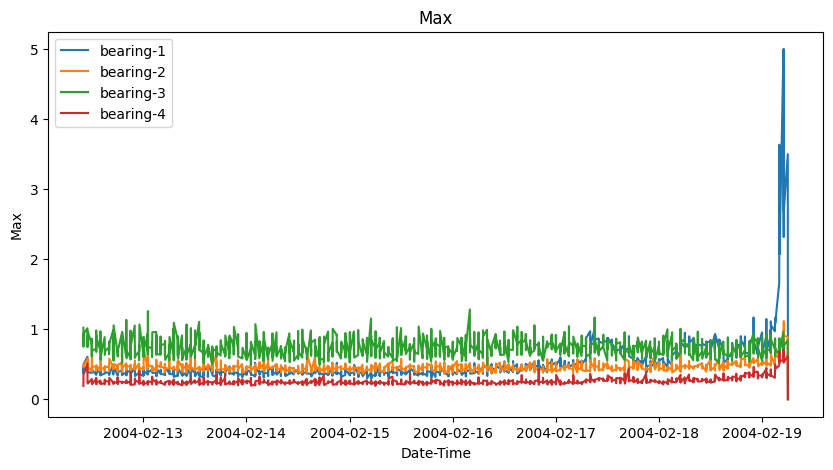

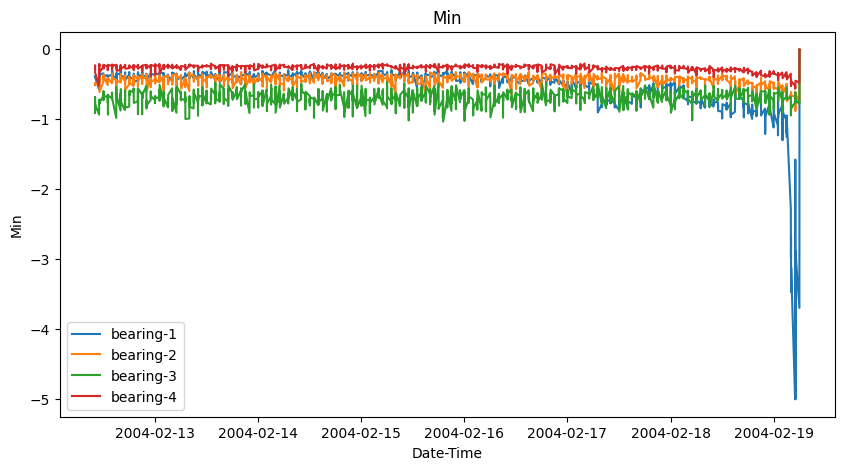

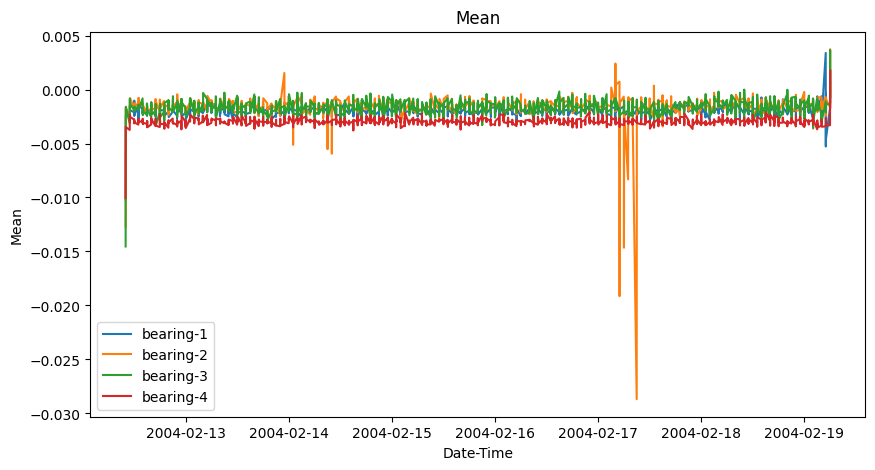

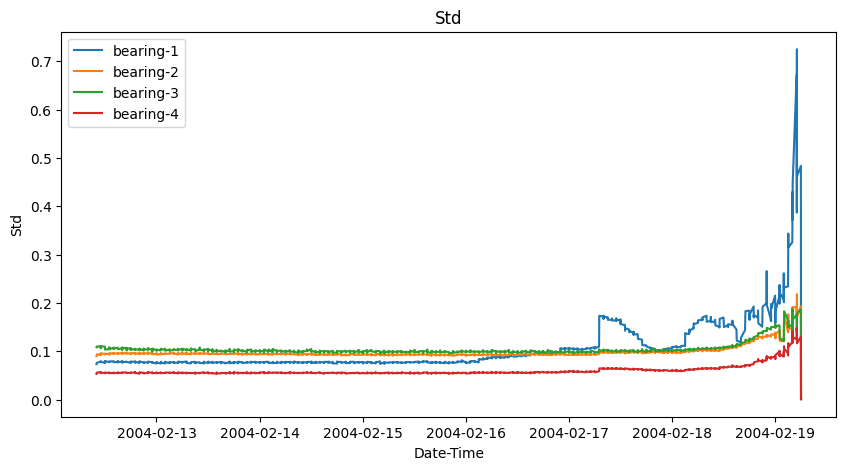

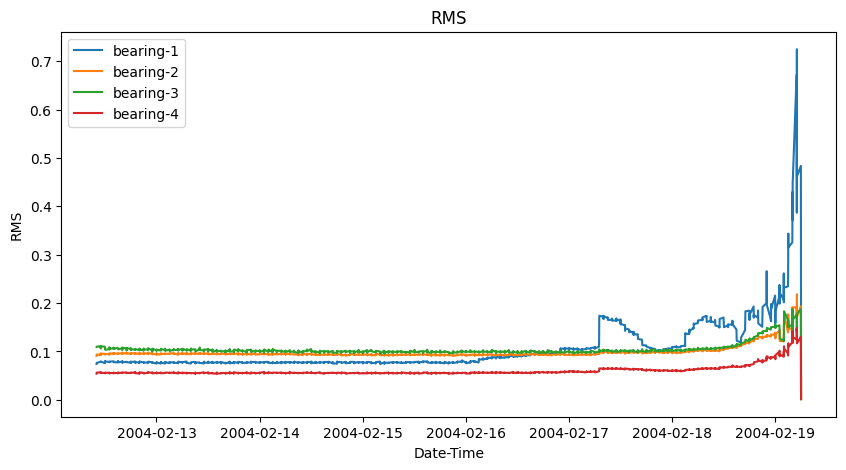

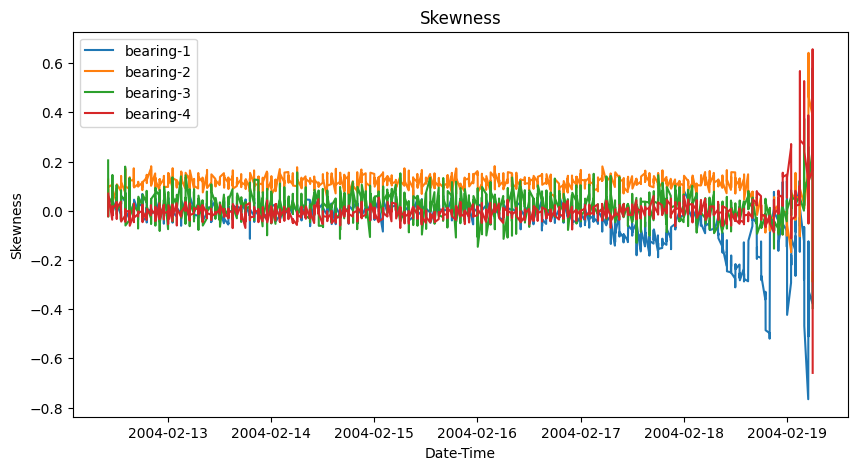

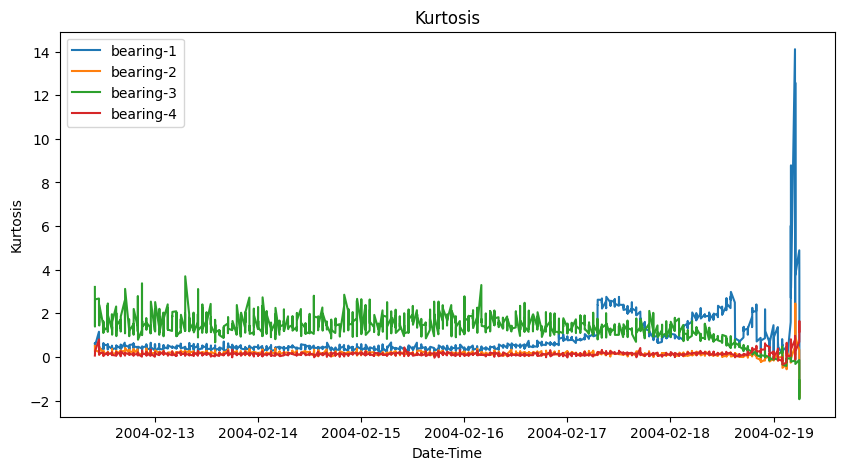

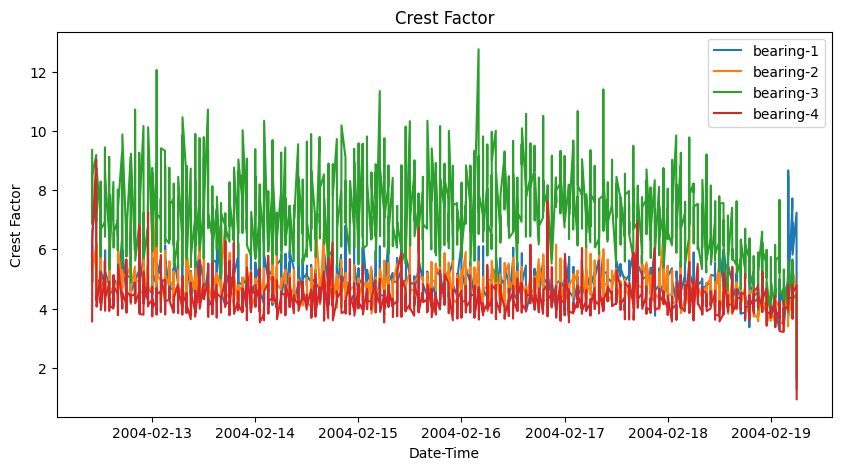

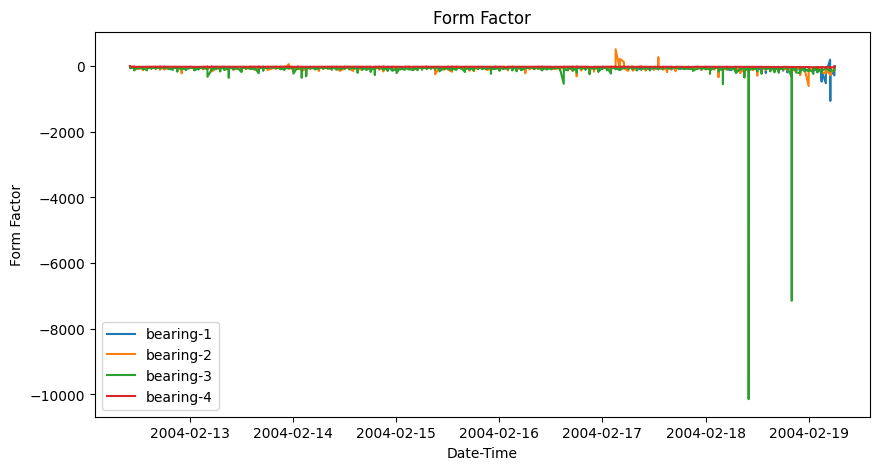

In [73]:
for col in (df1.columns):

        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()


Saving the Outer Race **Fault**

In [74]:
df=df1['2004-02-18 00:32:00':'2004-02-19 06:22:00']

In [75]:
fault=[]
for i in range (0,len(df)):
    fault.append('Outer Race')

df['Fault']=fault
df

<ipython-input-75-7a8ebc5b887c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-02-18 01:00:00,0.591,-0.461,-0.002320,0.110181,0.110203,0.047600,1.030564,5.362826,-47.495934,Outer Race
2004-02-18 01:01:00,0.498,-0.630,-0.002595,0.109821,0.109849,-0.018426,0.916435,4.533508,-42.336963,Outer Race
2004-02-18 01:02:00,0.459,-0.508,-0.002251,0.108539,0.108560,-0.003636,0.893567,4.228077,-48.228998,Outer Race
2004-02-18 01:03:00,0.481,-0.500,-0.001853,0.109701,0.109714,-0.006497,0.848657,4.384111,-59.194147,Outer Race
2004-02-18 01:04:00,0.508,-0.505,-0.001722,0.110204,0.110215,0.032004,0.906351,4.609167,-63.988835,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-02-19 05:04:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510556,12.577705,6.893779,-263.426419,Outer Race
2004-02-19 05:05:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325368,3.759972,5.818035,-102.977656,Outer Race
2004-02-19 06:00:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377095,4.891755,7.235932,-284.094983,Outer Race
2004-02-19 06:01:00,0.005,0.000,0.001857,0.000987,0.002103,0.579698,3.637513,2.377543,1.132578,Outer Race


In [76]:
df.to_csv('outer_race_fault.csv',index=False)

**Saving the Normal Bearing data**

In [77]:
df=df1['2004-02-14 00:32:00':'2004-02-15 06:22:00']
fault=[]
for i in range (0,len(df)):
    fault.append('Normal')

df['Fault']=fault

df.to_csv('Normal.csv',index=False)

<ipython-input-77-b07e49fc41e0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault']=fault


In [78]:
df=pd.read_csv('Normal.csv')
df


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.386,-0.444,-0.002093,0.077829,0.077855,0.016957,0.505074,4.957911,-37.197670,Normal
1,0.403,-0.308,-0.002283,0.076113,0.076145,0.009798,0.328611,5.292524,-33.349428,Normal
2,0.369,-0.415,-0.002144,0.078088,0.078116,0.013797,0.425586,4.723757,-36.427238,Normal
3,0.415,-0.322,-0.001860,0.076445,0.076466,0.002854,0.350547,5.427238,-41.112778,Normal
4,0.347,-0.378,-0.002017,0.077823,0.077847,0.013826,0.300351,4.457442,-38.595754,Normal
...,...,...,...,...,...,...,...,...,...,...
175,0.332,-0.371,-0.002509,0.076533,0.076572,-0.009497,0.368111,4.335790,-30.517329,Normal
176,0.339,-0.325,-0.001809,0.076207,0.076226,-0.001224,0.314021,4.447283,-42.143319,Normal
177,0.356,-0.330,-0.001504,0.076098,0.076111,-0.018632,0.238643,4.677362,-50.600847,Normal
178,0.427,-0.383,-0.002059,0.076209,0.076235,0.012246,0.480251,5.601099,-37.028188,Normal


In [ ]:
# DATA VISUALIZATION

*Test-1

*   Channel Arrangement: Bearing 1 – Ch 1&2; Bearing 2 – Ch 3&4;Bearing 3 – Ch 5&6; Bearing 4 – Ch 7&8.
*   At the end of the test-to-failure experiment, inner race defect occurred in bearing 3 and roller element defect in bearing 4.



In [79]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os

In [80]:
test_no=1

df1 = pd.read_csv("/content/Time_feature_matrix_Bearing_1_Test_1.csv".format(test_no),index_col='Unnamed: 0')
df2 = pd.read_csv("/content/Time_feature_matrix_Bearing_2_Test_1 (2).csv".format(test_no),index_col='Unnamed: 0')
df3 = pd.read_csv("/content/Time_feature_matrix_Bearing_3_Test_1.csv".format(test_no),index_col='Unnamed: 0')
df4 = pd.read_csv("/content/Time_feature_matrix_Bearing_4_Test_1.csv".format(test_no),index_col='Unnamed: 0')

df1.index = pd.to_datetime(df1.index)

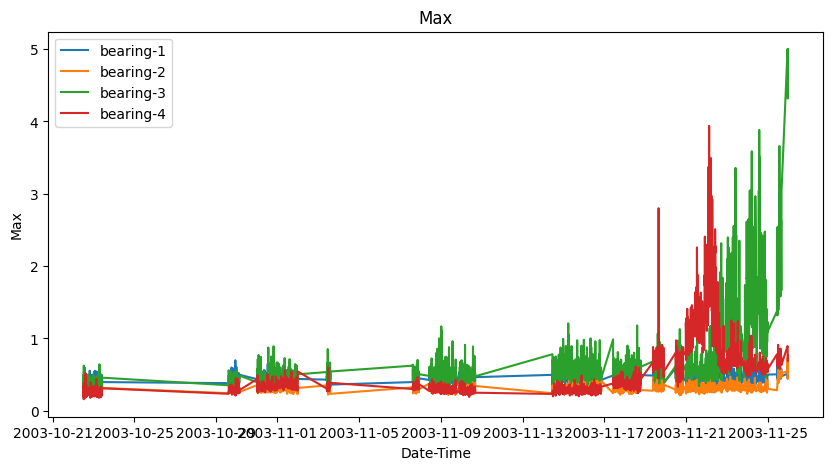

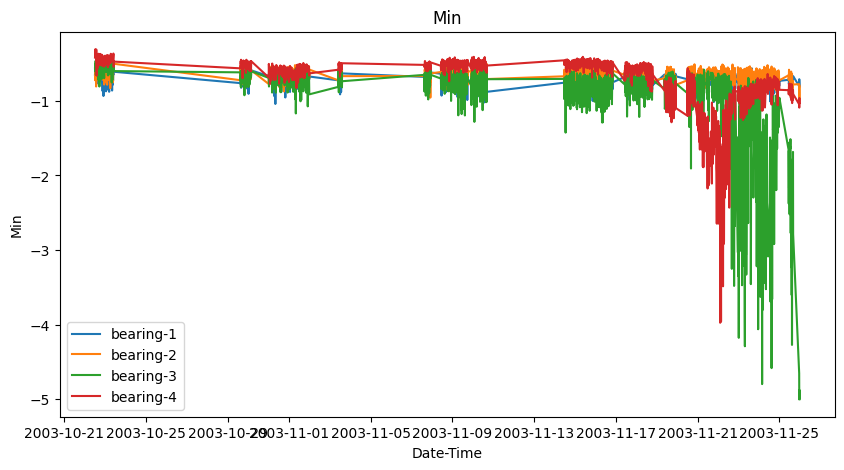

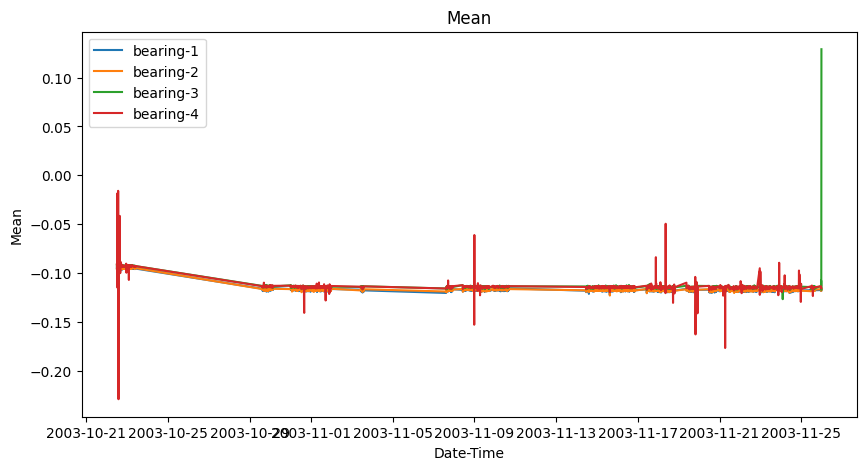

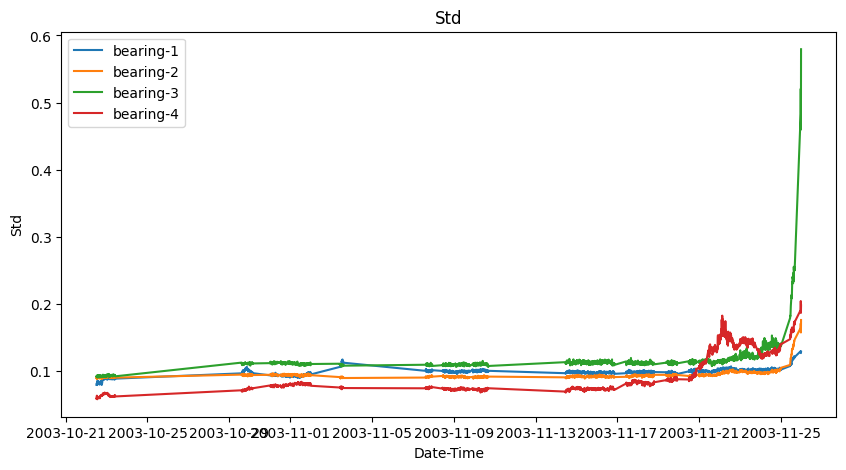

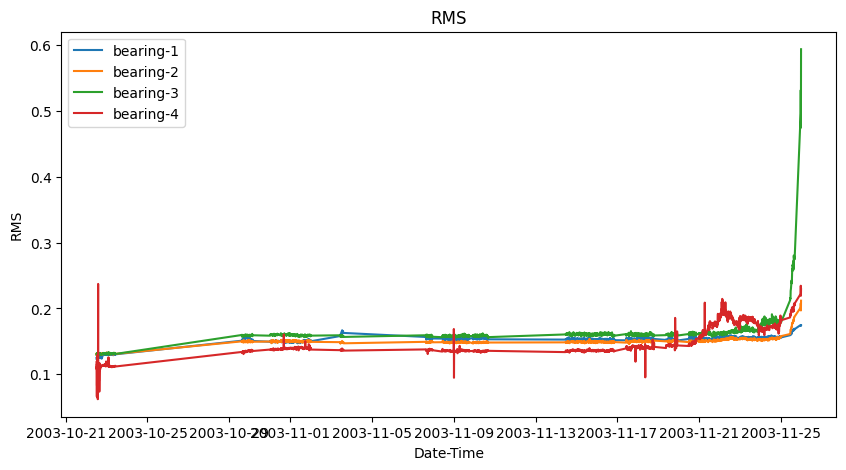

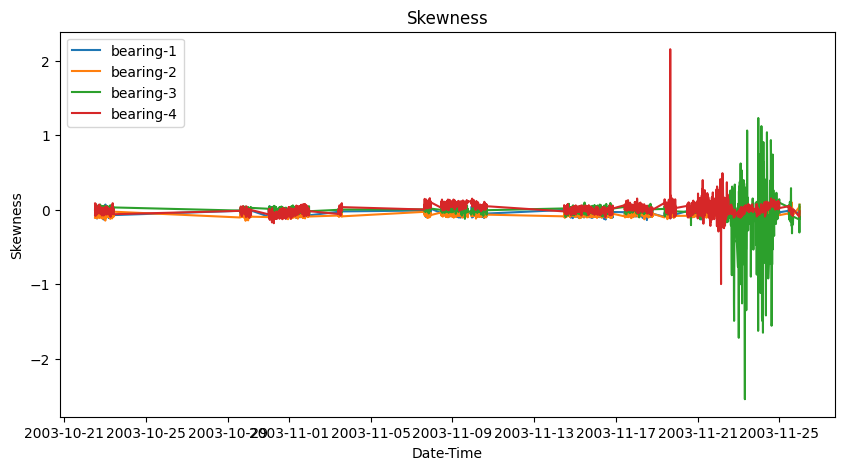

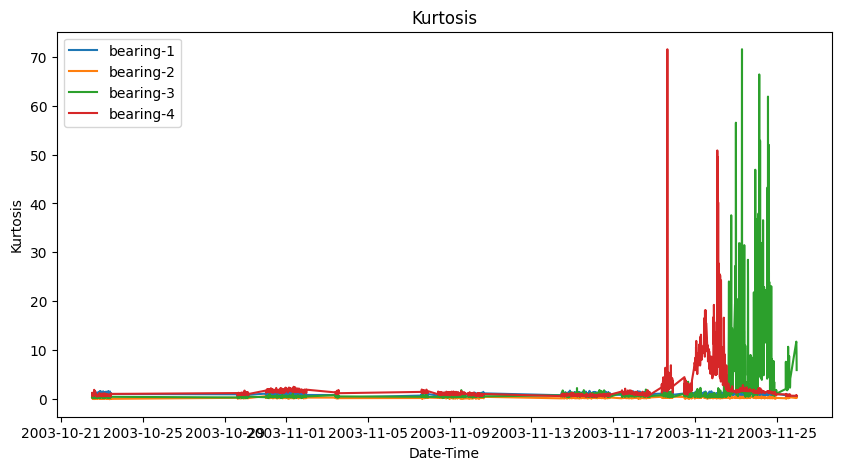

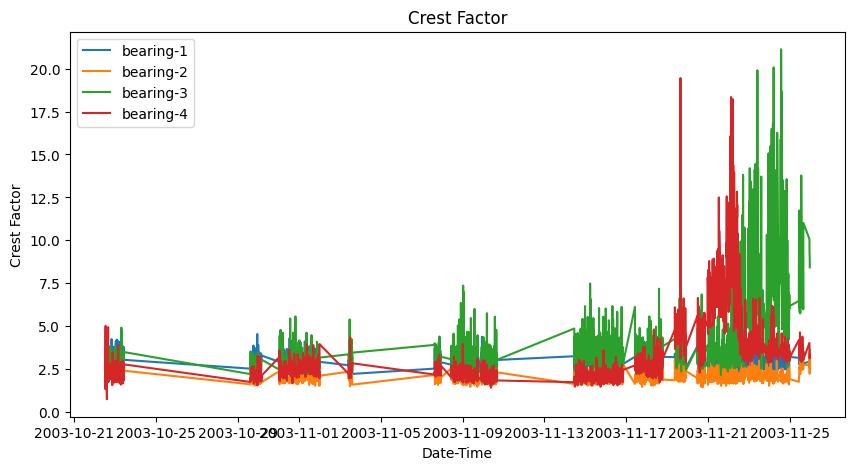

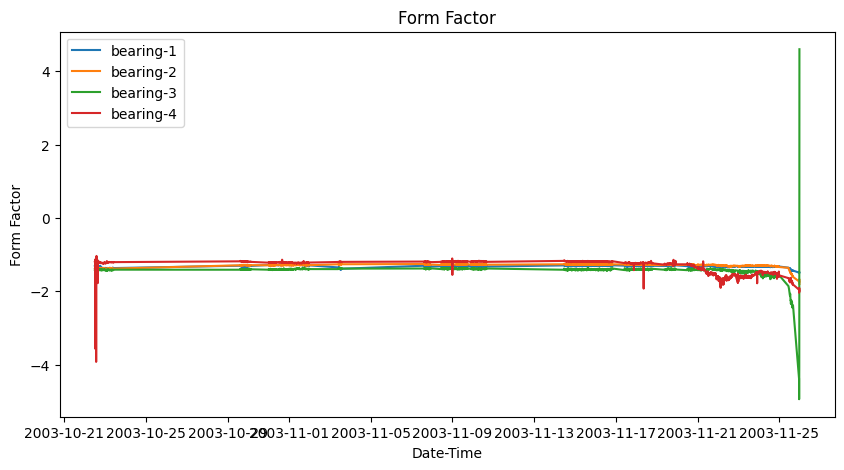

In [81]:
for i,col in enumerate(df1.columns):

        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

**Saving Inner race fault**

In [82]:
df_irf=df3['2003-11-21 00:32:00':'2003-11-24 18:22:00']
fault=[]
for i in range (0,len(df_irf)):
    fault.append('Inner Race')

df_irf['Fault']=fault
df_irf

<ipython-input-82-2f6ad1a1b4ef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_irf['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-21 00:34:00,0.427,-0.957,-0.114388,0.113003,0.160790,0.002204,0.748889,2.655631,-1.405658,Inner Race
2003-11-21 00:44:00,0.630,-0.854,-0.114292,0.112194,0.160155,-0.017072,0.811215,3.933684,-1.401278,Inner Race
2003-11-21 00:54:00,0.645,-0.718,-0.114115,0.111576,0.159596,0.048754,0.529153,4.041466,-1.398555,Inner Race
2003-11-21 01:04:00,0.815,-0.728,-0.115024,0.110413,0.159439,0.060862,0.963834,5.111659,-1.386143,Inner Race
2003-11-21 01:14:00,0.474,-0.710,-0.115375,0.113216,0.161644,-0.018933,0.650481,2.932379,-1.401027,Inner Race
...,...,...,...,...,...,...,...,...,...,...
2003-11-24 17:37:00,0.786,-1.250,-0.115312,0.138938,0.180554,-0.111261,1.573230,4.353273,-1.565789,Inner Race
2003-11-24 17:47:00,2.422,-2.920,-0.114495,0.149198,0.188064,-0.349044,23.063438,12.878582,-1.642549,Inner Race
2003-11-24 17:57:00,1.416,-1.660,-0.113348,0.143781,0.183083,0.052130,4.405831,7.734177,-1.615236,Inner Race
2003-11-24 18:07:00,1.123,-2.158,-0.114289,0.138973,0.179929,-0.076219,4.236015,6.241339,-1.574332,Inner Race


In [83]:
df_irf.to_csv('inner_race_fault.csv',index=False)

**Saving Roller Element fault**

In [84]:
df_ref=df4['2003-11-21 00:32:00':'2003-11-24 18:22:00']
fault=[]
for i in range (0,len(df_ref)):
    fault.append('Roller Element')

df_ref['Fault']=fault
df_ref

<ipython-input-84-7ee0d05ae3ce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-21 00:34:00,1.282,-1.396,-0.115392,0.103224,0.154822,0.028321,8.422105,8.280452,-1.341707,Roller Element
2003-11-21 00:44:00,1.152,-1.108,-0.114562,0.107756,0.157274,0.103448,7.957752,7.324781,-1.372835,Roller Element
2003-11-21 00:54:00,0.972,-1.270,-0.112217,0.109194,0.156574,-0.088235,7.721262,6.207928,-1.395278,Roller Element
2003-11-21 01:04:00,0.945,-1.147,-0.113799,0.102681,0.153275,-0.001167,5.874304,6.165408,-1.346890,Roller Element
2003-11-21 01:14:00,1.096,-1.228,-0.114494,0.106910,0.156646,0.114157,6.682607,6.996648,-1.368164,Roller Element
...,...,...,...,...,...,...,...,...,...,...
2003-11-24 17:37:00,0.701,-0.764,-0.114628,0.131560,0.174490,0.134774,1.459441,4.017426,-1.522231,Roller Element
2003-11-24 17:47:00,0.571,-0.667,-0.114702,0.126378,0.170667,0.071571,1.195710,3.345699,-1.487915,Roller Element
2003-11-24 17:57:00,0.623,-0.708,-0.114239,0.126722,0.170611,0.100394,1.255684,3.651572,-1.493457,Roller Element
2003-11-24 18:07:00,0.752,-0.686,-0.114455,0.128396,0.172002,0.086076,1.189483,4.372047,-1.502786,Roller Element


In [85]:

df_ref.to_csv('roller_element_fault.csv',index=False)


*Test 2


*  Channel Arrangement: Bearing 1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch3; Bearing 4 – Ch 4.
*   At the end of the test-to-failure experiment, outer race failure occurred in bearing 1.



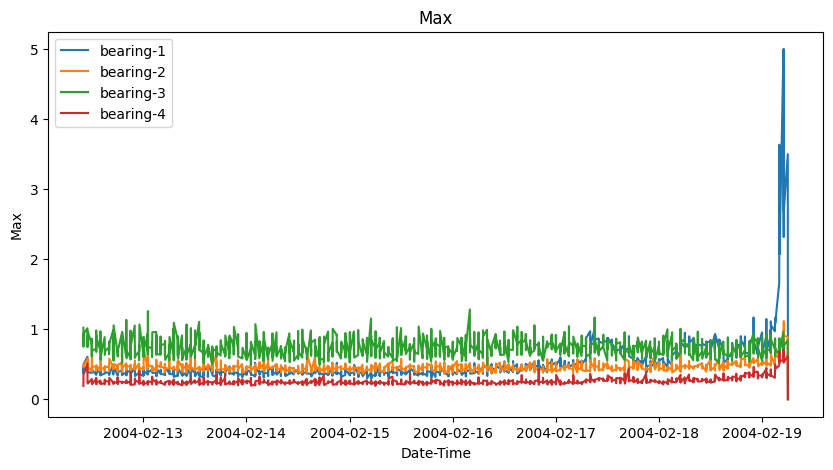

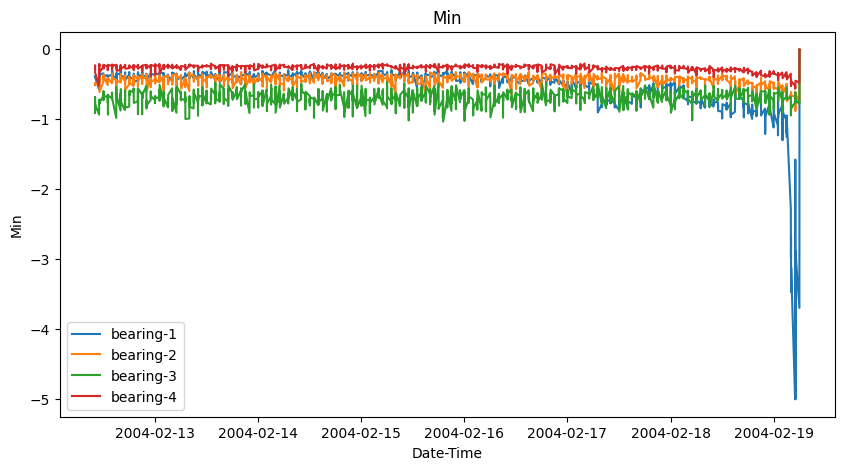

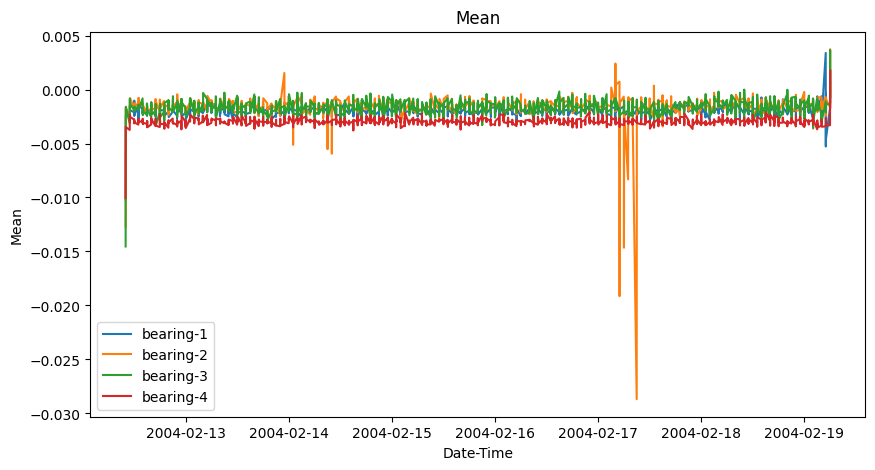

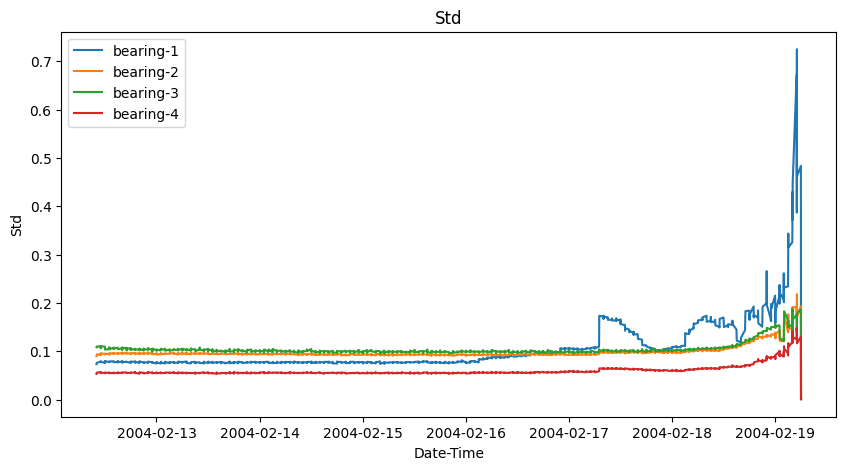

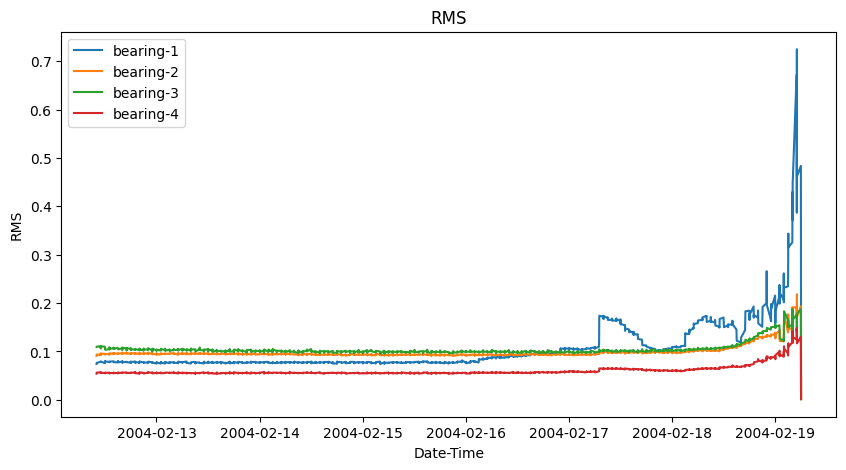

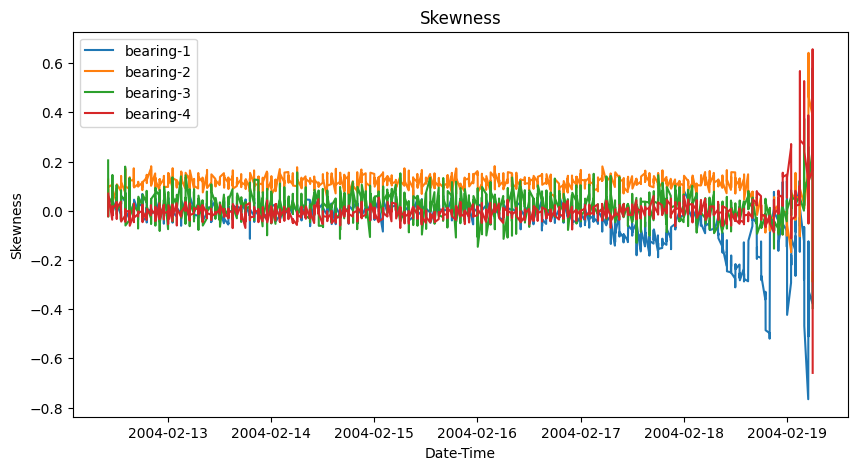

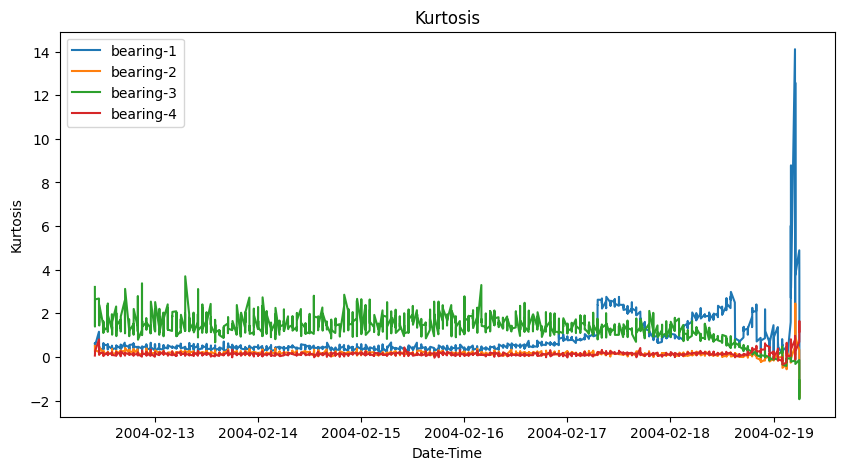

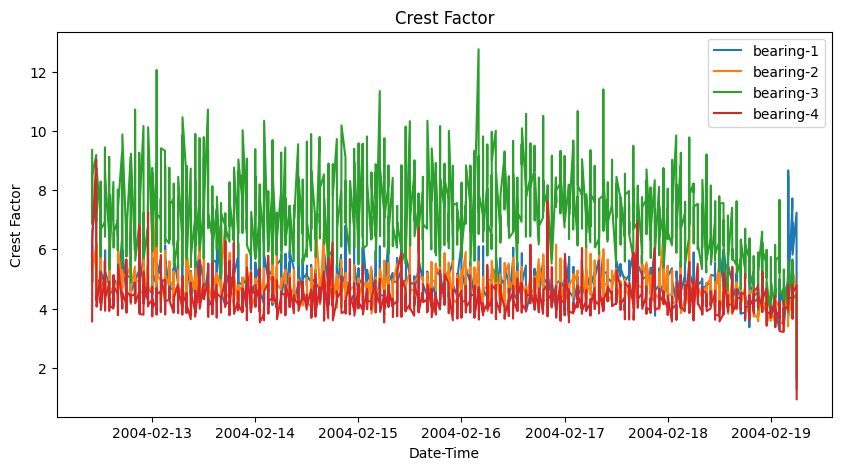

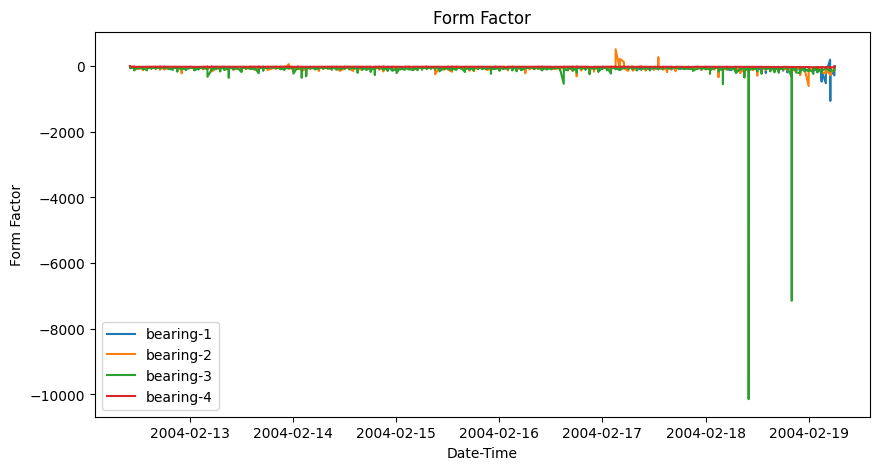

In [87]:
test_no=2

df1 = pd.read_csv("/content/Time_feature_matrix_Bearing_1_Test_2.csv".format(test_no),index_col='Unnamed: 0')
df2 = pd.read_csv("/content/Time_feature_matrix_Bearing_2_Test_2.csv".format(test_no),index_col='Unnamed: 0')
df3 = pd.read_csv("/content/Time_feature_matrix_Bearing_3_Test_2.csv".format(test_no),index_col='Unnamed: 0')
df4 = pd.read_csv("/content/Time_feature_matrix_Bearing_4_Test_2.csv".format(test_no),index_col='Unnamed: 0')

df1.index = pd.to_datetime(df1.index)

for i,col in enumerate(df1.columns):

        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()


Saving Outer Race Fault **bold text**

In [32]:
df_orf=df1['2004-02-17 12:32:00':'2004-02-19 00:42:00']
fault=[]
for i in range (0,len(df_orf)):
    fault.append('Outer Race')

df_orf['Fault']=fault

df_orf.to_csv('outer_race_fault_test_2.csv',index=False)
df_orf

**Test 3**


*  Bearing1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch3; Bearing4 – Ch4
*   At the end of the test-to-failure experiment, outer race failure occurred in bearing 3.



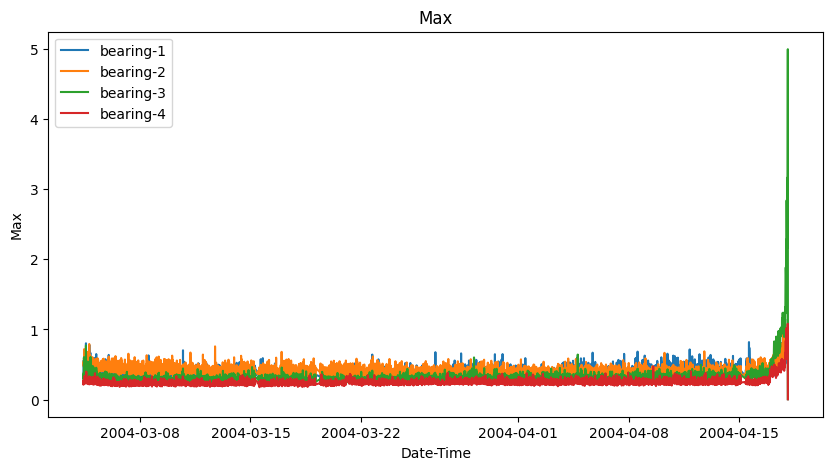

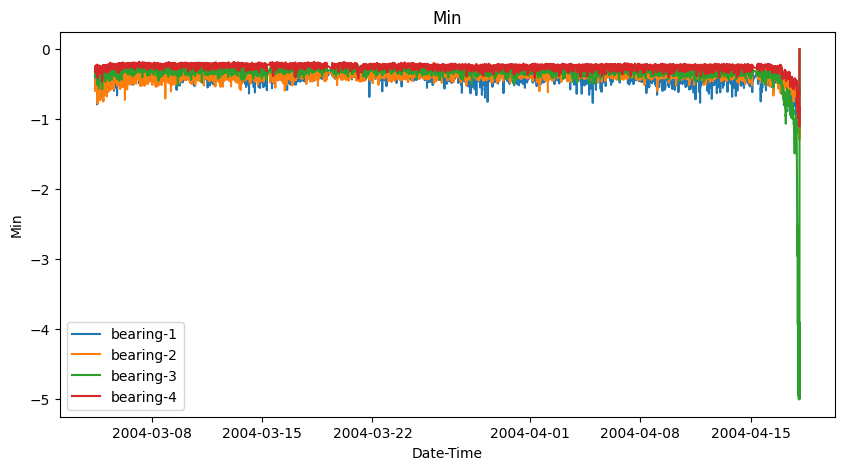

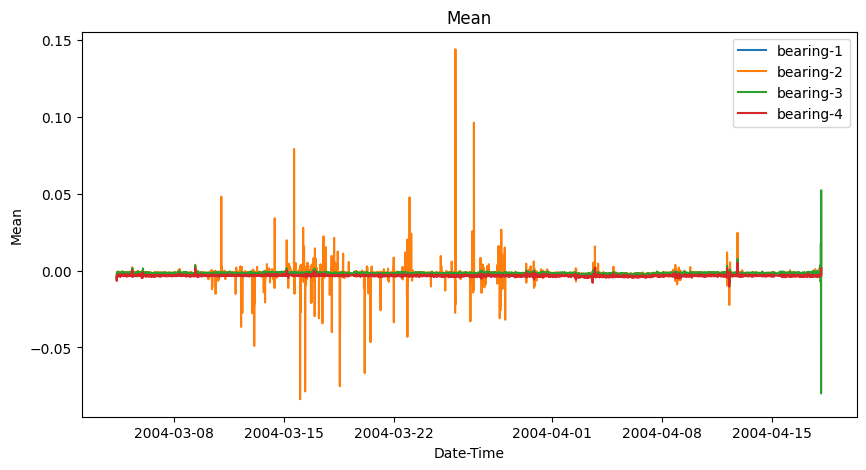

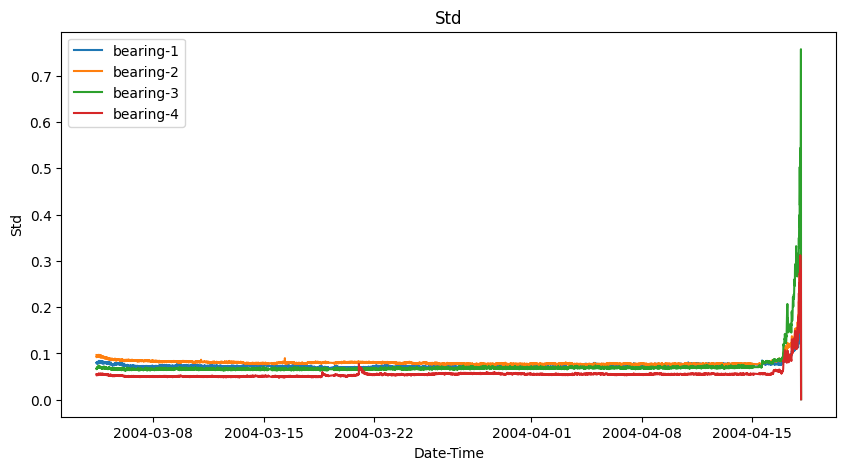

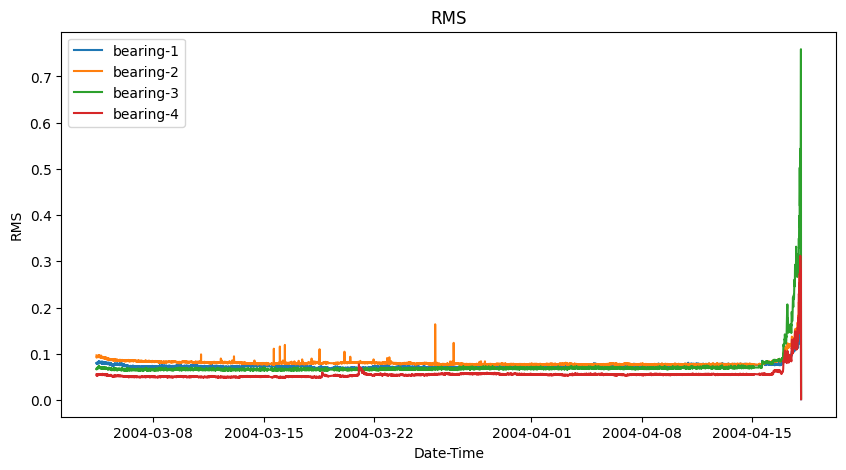

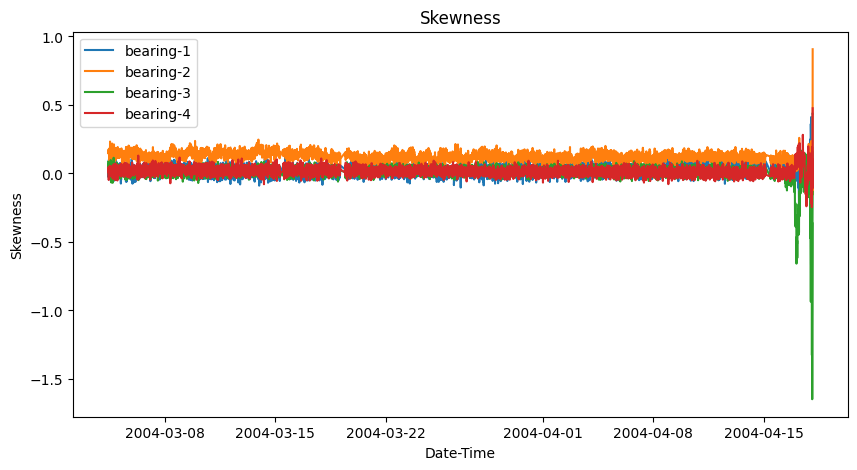

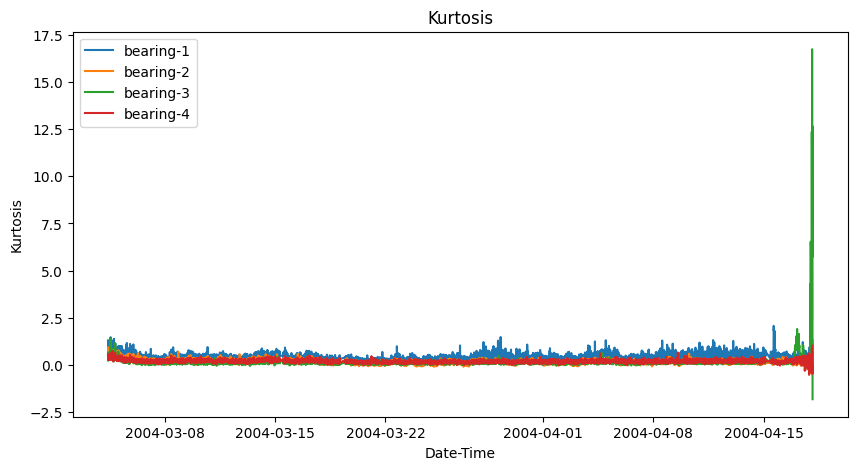

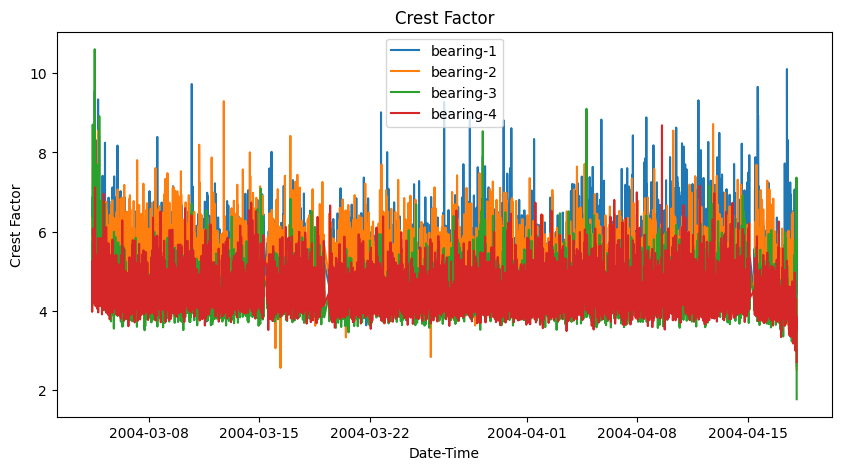

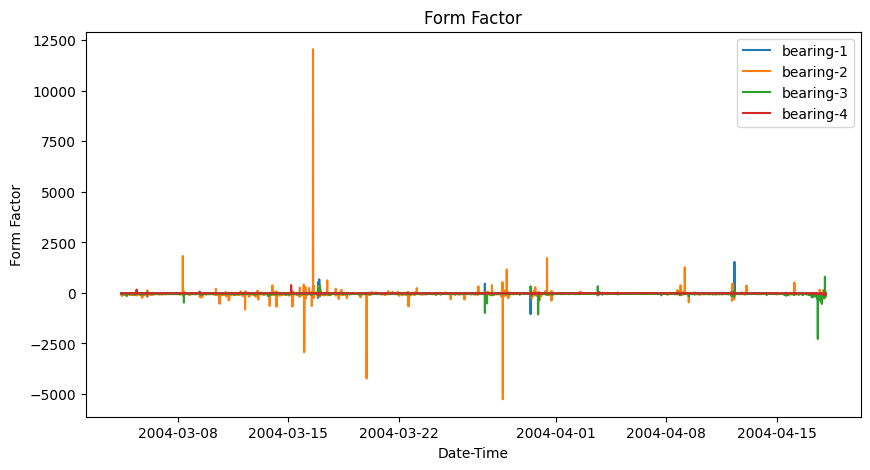

In [89]:
test_no=3

df1 = pd.read_csv("/content/Time_feature_matrix_Bearing_1_Test_3.csv".format(test_no),index_col='Unnamed: 0')
df2 = pd.read_csv("/content/Time_feature_matrix_Bearing_2_Test_3.csv".format(test_no),index_col='Unnamed: 0')
df3 = pd.read_csv("/content/Time_feature_matrix_Bearing_3_Test_3.csv".format(test_no),index_col='Unnamed: 0')
df4 = pd.read_csv("/content/Time_feature_matrix_Bearing_4_Test_3.csv".format(test_no),index_col='Unnamed: 0')

df1.index = pd.to_datetime(df1.index)

for i,col in enumerate(df1.columns):

        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()


Saving Outer Race Fault **bold text**

In [90]:

df3

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.361,-0.310,-0.005148,0.066192,0.066390,0.083449,0.591902,5.437565,-12.896399
2004-03-04 09:32:00,0.295,-0.295,-0.006310,0.065986,0.066285,0.011828,0.359751,4.450449,-10.505622
2004-03-04 09:42:00,0.286,-0.286,-0.001293,0.069176,0.069186,0.049056,0.213724,4.133782,-53.519544
2004-03-04 09:52:00,0.349,-0.310,-0.002280,0.068600,0.068637,0.002209,0.299035,5.084751,-30.099513
2004-03-04 10:02:00,0.388,-0.374,-0.001727,0.067449,0.067469,0.031884,0.395754,5.750781,-39.058344
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,3.167,-5.000,0.017613,0.495062,0.495363,-1.648364,16.742241,6.393285,28.124430
2004-04-18 02:12:00,2.378,-3.899,-0.002114,0.454472,0.454466,-0.656841,5.707273,5.232514,-214.967877
2004-04-18 02:22:00,4.346,-5.000,-0.079840,0.584635,0.590047,-0.426006,12.660025,7.365514,-7.390347
2004-04-18 02:32:00,4.998,-5.000,0.052137,0.756990,0.758765,-0.220131,7.058920,6.587018,14.553238


**Collect The Normal Data From all the bearings**

In [91]:
df_orf=df3['2004-04-15 12:32:00':'2004-04-18 00:42:00']
fault=[]
for i in range (0,len(df_orf)):
    fault.append('Outer Race')

df_orf['Fault']=fault

df_orf.to_csv('outer_race_fault_test_3.csv',index=False)
df_orf

<ipython-input-91-bc3b86615c59>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orf['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-04-15 12:32:00,0.315,-0.300,-0.002260,0.071999,0.072032,-0.017350,0.161074,4.373034,-31.867085,Outer Race
2004-04-15 12:42:00,0.278,-0.320,-0.000929,0.071960,0.071965,-0.020822,0.203632,3.863014,-77.468263,Outer Race
2004-04-15 12:52:00,0.403,-0.300,-0.001721,0.071967,0.071986,0.009853,0.275335,5.598312,-41.838775,Outer Race
2004-04-15 13:02:00,0.334,-0.332,-0.001242,0.070479,0.070488,0.037436,0.131765,4.738400,-56.769549,Outer Race
2004-04-15 13:12:00,0.295,-0.334,-0.002482,0.072242,0.072283,-0.030286,0.181303,4.081162,-29.120361,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-04-18 00:02:00,2.280,-3.936,-0.001821,0.394083,0.394077,-0.416217,6.095530,5.785668,-216.407494,Outer Race
2004-04-18 00:12:00,1.750,-3.423,-0.002377,0.395931,0.395928,-0.664070,3.988261,4.419990,-166.549208,Outer Race
2004-04-18 00:22:00,2.202,-3.013,-0.004019,0.384375,0.384387,-0.150122,2.377175,5.728602,-95.651873,Outer Race
2004-04-18 00:32:00,1.824,-3.335,-0.003547,0.373875,0.373883,-0.408740,4.726666,4.878529,-105.403295,Outer Race


In [97]:
Test=[1,2,3]
Bearing_No=[1,2,3,4]

df_normal_bearing_list = []  # Use a list to store DataFrames

for test_no in Test:
    for bearing_no in Bearing_No:
        temp = pd.read_csv("/content/Time_feature_matrix_Bearing_1_Test_1.csv".format(bearing_no,test_no),index_col='Unnamed: 0')

        starting = int(np.floor(len(temp)*.21))
        ending = int(np.floor(len(temp)*.23))

        start_time = temp.index[starting]
        end_time = temp.index[ending]

        temp = temp[start_time:end_time]

        df_normal_bearing_list.append(temp) # Append to the list

# Concatenate all DataFrames in the list
df_normal_bearing = pd.concat(df_normal_bearing_list)

fault=[]
for i in range (0,len(df_normal_bearing)):
    fault.append('Normal')

df_normal_bearing['Fault']=fault

df_normal_bearing.to_csv('Normal_Bearing.csv',index=False)

In [98]:

df_normal_bearing

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-01 14:11:00,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798,Normal
2003-11-01 14:21:00,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240,Normal
2003-11-01 14:31:00,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821,Normal
2003-11-01 14:41:00,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921,Normal
2003-11-01 14:51:00,0.479,-0.659,-0.116594,0.093409,0.149395,-0.002756,1.290804,3.206260,-1.281329,Normal
...,...,...,...,...,...,...,...,...,...,...
2003-11-01 20:41:00,0.457,-0.774,-0.117749,0.098065,0.153236,-0.067146,1.210488,2.982330,-1.301375,Normal
2003-11-01 20:51:00,0.464,-0.640,-0.117508,0.096453,0.152023,0.000649,0.772561,3.052165,-1.293722,Normal
2003-11-01 21:01:00,0.400,-0.627,-0.115828,0.095025,0.149818,-0.006591,0.788059,2.669900,-1.293451,Normal
2003-11-01 21:11:00,0.398,-0.771,-0.118558,0.096801,0.153056,-0.087649,1.036630,2.600362,-1.290973,Normal


**------------------ Dimensionality reduction and Visualization ------------**

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [100]:
df1=pd.read_csv('Normal_Bearing.csv')
df2=pd.read_csv('outer_race_fault_test_2.csv')
df3=pd.read_csv('outer_race_fault_test_3.csv')
df4=pd.read_csv('inner_race_fault.csv')
df5=pd.read_csv('roller_element_fault.csv')

df = pd.concat([df1,df2,df3,df4,df5])
df = df.reset_index(drop=True)
df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798,Normal
1,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240,Normal
2,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821,Normal
3,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921,Normal
4,0.479,-0.659,-0.116594,0.093409,0.149395,-0.002756,1.290804,3.206260,-1.281329,Normal
...,...,...,...,...,...,...,...,...,...,...
2031,0.701,-0.764,-0.114628,0.131560,0.174490,0.134774,1.459441,4.017426,-1.522231,Roller Element
2032,0.571,-0.667,-0.114702,0.126378,0.170667,0.071571,1.195710,3.345699,-1.487915,Roller Element
2033,0.623,-0.708,-0.114239,0.126722,0.170611,0.100394,1.255684,3.651572,-1.493457,Roller Element
2034,0.752,-0.686,-0.114455,0.128396,0.172002,0.086076,1.189483,4.372047,-1.502786,Roller Element


In [101]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


PCA with TWO Principal Components **bold text**

In [102]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(X)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

principalDf['Fault']=np.array(df['Fault'])

In [103]:

principalDf

,principal component 1,principal component 2,Fault
0,-1.212746,-0.734483,Normal
1,-1.209792,-0.801222,Normal
2,-1.268147,-0.663480,Normal
3,-1.054604,-0.770440,Normal
4,-1.087015,-0.776833,Normal
...,...,...,...
2031,-0.245775,-0.212694,Roller Element
2032,-0.606525,-0.216606,Roller Element
2033,-0.485919,-0.247262,Roller Element
2034,-0.236198,-0.255878,Roller Element


In [104]:

principalDf['Fault'].unique()


array(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'],
      dtype=object)

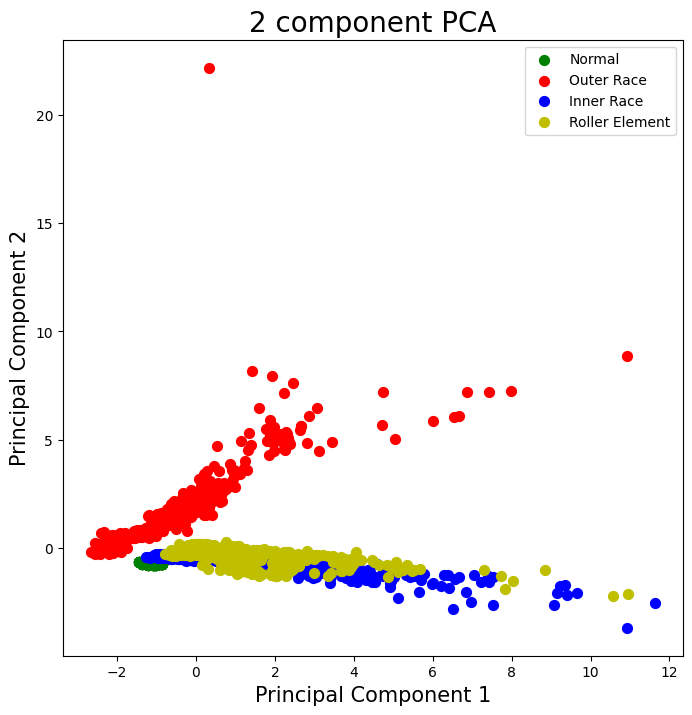

In [105]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
fault = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']
colors = ['g', 'r','b','y']
for fault, color in zip(fault,colors):
    indicesToKeep = principalDf['Fault'] == fault
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])

In [106]:
sum(pca_2.explained_variance_ratio_)
pca_2.explained_variance_ratio_

array([0.43146086, 0.21602714])

PCA with THREE Principal **Components** ****

In [107]:
from mpl_toolkits.mplot3d import Axes3D

In [108]:
X = StandardScaler().fit_transform(X)

pca_3 = PCA(n_components=3)

X_pca = pca_3.fit_transform(X)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2','principal component 3'])

principalDf['Fault']=np.array(df['Fault'])

In [109]:

principalDf


,principal component 1,principal component 2,principal component 3,Fault
0,-1.212746,-0.734483,-0.359472,Normal
1,-1.209792,-0.801222,-0.459010,Normal
2,-1.268147,-0.663480,-0.222751,Normal
3,-1.054604,-0.770440,-0.330117,Normal
4,-1.087015,-0.776833,-0.387105,Normal
...,...,...,...,...
2031,-0.245775,-0.212694,-1.247162,Roller Element
2032,-0.606525,-0.216606,-1.051586,Roller Element
2033,-0.485919,-0.247262,-1.104719,Roller Element
2034,-0.236198,-0.255878,-1.077963,Roller Element


In [111]:
!pip install PyQt5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 kB 15.5 MB/s eta 0:00:00


In [113]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend like 'Agg'

# ... rest of your code ...

fig.savefig('3d_pca_plot.png')  # Save the plot to a file

In [115]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ... (Your existing code for data preparation) ...

# Use a non-interactive backend like 'Agg'
matplotlib.use('Agg')

fig = plt.figure(figsize=(10,14))

# syntax for 3-D projection
ax = plt.axes(projection='3d')

# defining all 3 axes
fault = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']
colors = ['g', 'r','b','y']
for fault, color in zip(fault,colors):
    indicesToKeep = principalDf['Fault'] == fault
    ax.scatter3D(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , principalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])


# plotting
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3D PCA')
ax.view_init(45,90)

# Save the figure to a file instead of displaying it interactively
plt.savefig('3d_pca_plot.png')

In [116]:
np.sum(pca_3.explained_variance_ratio_)
#pca.explained_variance_ratio_

0.7915592591646935

**------------------------------- Classification of Faults ---------------------------------**

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [118]:
df1=pd.read_csv('Normal_Bearing.csv')
df2=pd.read_csv('outer_race_fault_test_2.csv')
df3=pd.read_csv('outer_race_fault_test_3.csv')
df4=pd.read_csv('inner_race_fault.csv')
df5=pd.read_csv('roller_element_fault.csv')

In [119]:
df = pd.concat([df1,df2,df3,df4,df5])
df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798,Normal
1,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240,Normal
2,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821,Normal
3,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921,Normal
4,0.479,-0.659,-0.116594,0.093409,0.149395,-0.002756,1.290804,3.206260,-1.281329,Normal
...,...,...,...,...,...,...,...,...,...,...
460,0.701,-0.764,-0.114628,0.131560,0.174490,0.134774,1.459441,4.017426,-1.522231,Roller Element
461,0.571,-0.667,-0.114702,0.126378,0.170667,0.071571,1.195710,3.345699,-1.487915,Roller Element
462,0.623,-0.708,-0.114239,0.126722,0.170611,0.100394,1.255684,3.651572,-1.493457,Roller Element
463,0.752,-0.686,-0.114455,0.128396,0.172002,0.086076,1.189483,4.372047,-1.502786,Roller Element


In [120]:
# sns.set(rc={'figure.figsize':(10,6)})
# sns.scatterplot(x='Form Factor',y='Max',hue='Fault',data=df,palette='Dark2_r')

In [122]:
df['Fault'].unique()

array(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'],
      dtype=object)

In [123]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20)

In [131]:
%matplotlib inline


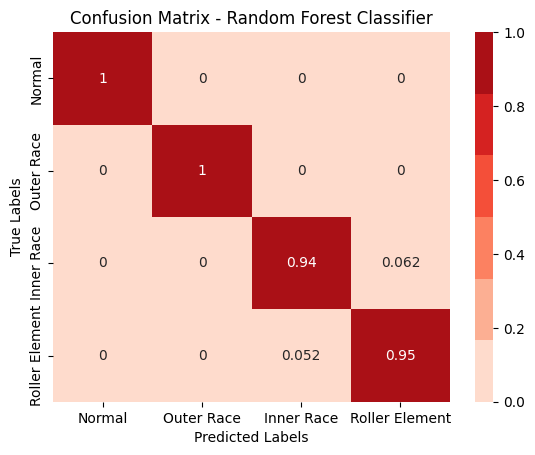

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Ensure plots are displayed inline
%matplotlib inline

# Fit the RandomForest model
rf_model = RandomForestClassifier().fit(X_train, y_train)

# Predict the test set results
y_pred = rf_model.predict(X_test)

# Define the class labels
labels = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')

# Create a new figure and axes for the heatmap
# This ensures a fresh 2D plotting environment
fig, ax = plt.subplots()

# Plot the confusion matrix
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True, cmap=colormap, xticklabels=labels, yticklabels=labels, ax=ax) # Specify the axes

# Add title and labels
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Explicitly show the plot
plt.show()

**Testing using this Random Forest Model**

* At the end of the TEST-1, inner race defect occurred in bearing 3 and roller element defect in bearing 4.

*  At the end of the TEST-2, outer race failure occurred in bearing 1.

*  At the end of the TEST-3, outer race failure occurred in bearing 3.



In [143]:
Test_no=2
Bearing_no=1

# Corrected file path and extension
test_2 = pd.read_csv("/content/Time_feature_matrix_Bearing_2_Test_1 (2).csv".format(Bearing_no,Test_no),index_col='Unnamed: 0')

In [145]:
y_pred_test_2 = rf_model.predict(test_2)
y_pred_test_2

array(['Normal', 'Normal', 'Normal', ..., 'Roller Element',
       'Roller Element', 'Roller Element'], dtype=object)

In [146]:
test_2['Fault']=y_pred_test_2

In [147]:
test_2


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-10-22 12:09:00,0.291,-0.645,-0.095620,0.090260,0.131490,-0.101433,0.229069,2.213098,-1.375137,Normal
2003-10-22 12:14:00,0.339,-0.613,-0.096213,0.090237,0.131906,-0.092065,0.208387,2.570019,-1.370982,Normal
2003-10-22 12:19:00,0.286,-0.598,-0.095777,0.090274,0.131614,-0.105791,0.188712,2.173018,-1.374174,Normal
2003-10-22 12:24:00,0.349,-0.725,-0.095952,0.088864,0.130779,-0.091974,0.260539,2.668628,-1.362964,Normal
2003-10-22 12:29:00,0.322,-0.701,-0.094532,0.089870,0.130432,-0.048987,0.226774,2.468724,-1.379766,Normal
...,...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,0.518,-0.781,-0.116901,0.146956,0.187779,-0.067323,0.332488,2.758560,-1.606308,Roller Element
2003-11-25 23:13:00,0.547,-0.776,-0.116428,0.164493,0.201525,0.035610,0.176369,2.714309,-1.730891,Roller Element
2003-11-25 23:19:00,0.728,-0.869,-0.118304,0.170994,0.207927,0.045444,0.367062,3.501234,-1.757559,Roller Element
2003-11-25 23:29:00,0.439,-0.991,-0.118210,0.157582,0.196989,-0.086948,0.212154,2.228553,-1.666433,Roller Element


In [148]:
test_2.index = pd.to_datetime(test_2.index)

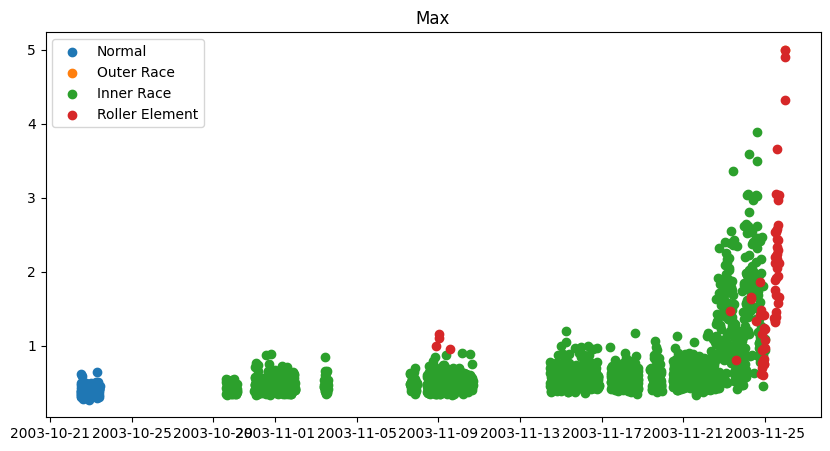

In [149]:
Test_no=1
Bearing_no=3


test_2 = pd.read_csv("Time_feature_matrix_Bearing_{}_Test_{}.csv".format(Bearing_no,Test_no),index_col='Unnamed: 0')
y_pred_test_2 = rf_model.predict(test_2)
test_2['Fault']=y_pred_test_2
test_2.index = pd.to_datetime(test_2.index)


norm = test_2[test_2['Fault']=='Normal']
Out_rac = test_2[test_2['Fault']=='Outer Race']
iner_rac = test_2[test_2['Fault']=='Inner Race']
roll_elem = test_2[test_2['Fault']=='Roller Element']

###############################################################

col='Max'                      # Change this value to any column name
plt.figure(figsize=(10, 5))
plt.scatter(norm.index,norm[col])
plt.scatter(Out_rac.index,Out_rac[col])
plt.scatter(iner_rac.index,iner_rac[col])
plt.scatter(roll_elem.index,roll_elem[col])

plt.legend(['Normal','Outer Race','Inner Race','Roller Element'])
plt.title(col)
plt.show()

<Axes: xlabel='None', ylabel='Max'>

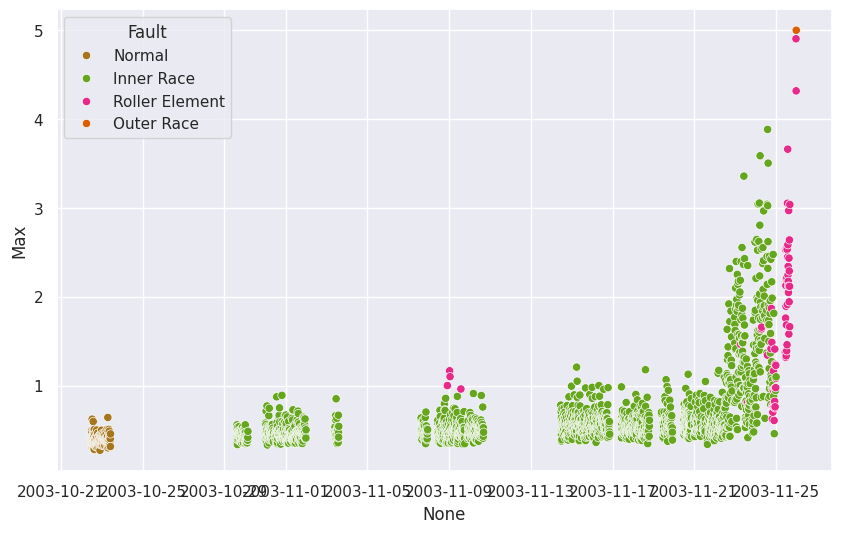

In [150]:
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(x=test_2.index,y='Max',hue='Fault',data=test_2,palette='Dark2_r')